<a href="https://colab.research.google.com/github/GustavoGatti/BreastCancerSiameseNeuralNetwork/blob/main/Breast_Cancer_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 40kB/s 
     |████████████████████████████████| 501kB 50.3MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 4.3MB 44.8MB/s 


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam


print(tf.__version__)

2.0.0-rc0


In [ ]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [ ]:
#cancer = datasets.load_breast_cancer()

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataR234.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


In [ ]:
z = pd.DataFrame(data=df)
z.drop('Classification', inplace=True, axis=1)
z

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [ ]:
#print(cancer.DESCR)

In [ ]:
'''
 x = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)
 x.head()
 '''

'\n x = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)\n x.head()\n '

In [ ]:
g = df.Classification
g

0      0
1      0
2      0
3      0
4      0
      ..
111    1
112    1
113    1
114    1
115    1
Name: Classification, Length: 116, dtype: int64

In [ ]:
'''
y = cancer.target
y
'''

'\ny = cancer.target\ny\n'

In [ ]:
#cancer.target_names

In [ ]:
#x.shape

In [ ]:
z.shape

(116, 9)

In [ ]:
'''
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0, stratify = y)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
x_train
'''

'\nx_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0, stratify = y)\nx_train = np.asarray(x_train)\ny_train = np.asarray(y_train)\nx_test = np.asarray(x_test)\ny_test = np.asarray(y_test)\nx_train\n'

In [ ]:
z_train, z_test, g_train, g_test = train_test_split(z,g, test_size = 0.2,random_state = 0, stratify = g)

z_train = np.asarray(z_train)
g_train = np.asarray(g_train)
z_test = np.asarray(z_test)
g_test = np.asarray(g_test)
z_train

array([[5.40000000e+01, 3.60500000e+01, 1.19000000e+02, 1.19100000e+01,
        3.49598200e+00, 8.92700000e+01, 8.01000000e+00, 5.06000000e+00,
        2.18280000e+02],
       [5.30000000e+01, 3.67901662e+01, 1.01000000e+02, 1.01750000e+01,
        2.53493167e+00, 2.71841000e+01, 2.00300000e+01, 1.02630900e+01,
        6.95754000e+02],
       [7.20000000e+01, 2.55900000e+01, 8.20000000e+01, 2.82000000e+00,
        5.70392000e-01, 2.49600000e+01, 3.37500000e+01, 3.27000000e+00,
        3.92460000e+02],
       [5.10000000e+01, 1.91326531e+01, 9.30000000e+01, 4.36400000e+00,
        1.00110160e+00, 1.10816000e+01, 5.80762000e+00, 5.57055000e+00,
        9.06000000e+01],
       [3.80000000e+01, 2.33400000e+01, 7.50000000e+01, 5.78200000e+00,
        1.06967000e+00, 1.52600000e+01, 1.79500000e+01, 9.35000000e+00,
        1.65020000e+02],
       [4.50000000e+01, 2.31404959e+01, 1.16000000e+02, 4.90200000e+00,
        1.40262560e+00, 1.79973000e+01, 4.29470500e+00, 5.26330000e+00,
        5.1

In [ ]:
#x_train.shape

In [ ]:
z_train.shape

(92, 9)

In [ ]:
#x_test.shape

In [ ]:
z_test.shape


(24, 9)

In [ ]:
'''
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
'''

'\nscaler = StandardScaler()\nx_train = scaler.fit_transform(x_train)\nx_test = scaler.transform(x_test)\n'

In [ ]:
z_train

array([[5.40000000e+01, 3.60500000e+01, 1.19000000e+02, 1.19100000e+01,
        3.49598200e+00, 8.92700000e+01, 8.01000000e+00, 5.06000000e+00,
        2.18280000e+02],
       [5.30000000e+01, 3.67901662e+01, 1.01000000e+02, 1.01750000e+01,
        2.53493167e+00, 2.71841000e+01, 2.00300000e+01, 1.02630900e+01,
        6.95754000e+02],
       [7.20000000e+01, 2.55900000e+01, 8.20000000e+01, 2.82000000e+00,
        5.70392000e-01, 2.49600000e+01, 3.37500000e+01, 3.27000000e+00,
        3.92460000e+02],
       [5.10000000e+01, 1.91326531e+01, 9.30000000e+01, 4.36400000e+00,
        1.00110160e+00, 1.10816000e+01, 5.80762000e+00, 5.57055000e+00,
        9.06000000e+01],
       [3.80000000e+01, 2.33400000e+01, 7.50000000e+01, 5.78200000e+00,
        1.06967000e+00, 1.52600000e+01, 1.79500000e+01, 9.35000000e+00,
        1.65020000e+02],
       [4.50000000e+01, 2.31404959e+01, 1.16000000e+02, 4.90200000e+00,
        1.40262560e+00, 1.79973000e+01, 4.29470500e+00, 5.26330000e+00,
        5.1

In [ ]:
scaler = StandardScaler()
z_train = scaler.fit_transform(z_train)
z_test = scaler.transform(z_test)

In [ ]:
'''
x_train = x_train.reshape(455,30,1)
x_test = x_test.reshape(114,30,1)
'''

'\nx_train = x_train.reshape(455,30,1)\nx_test = x_test.reshape(114,30,1)\n'

In [ ]:
z_train = z_train.reshape(92,9,1)
z_test = z_test.reshape(24,9,1)
z_train

array([[[-1.99870762e-01],
        [ 1.77497398e+00],
        [ 1.11147412e+00],
        [ 2.42579535e-01],
        [ 2.63712046e-01],
        [ 3.32084933e+00],
        [-3.53601251e-01],
        [-7.98401203e-01],
        [-8.96813736e-01]],

       [[-2.61575829e-01],
        [ 1.92667044e+00],
        [ 2.16240100e-01],
        [ 6.71901217e-02],
        [ 2.71926419e-03],
        [ 5.62315407e-02],
        [ 1.30573410e+00],
        [-3.89670515e-01],
        [ 4.67707681e-01]],

       [[ 9.10820452e-01],
        [-3.68794536e-01],
        [-7.28729138e-01],
        [-6.76319466e-01],
        [-5.30791475e-01],
        [-6.07166943e-02],
        [ 3.19975082e+00],
        [-9.39015325e-01],
        [-3.99043511e-01]],

       [[-3.84985964e-01],
        [-1.69222255e+00],
        [-1.81641684e-01],
        [-5.20238052e-01],
        [-4.13823515e-01],
        [-7.90474522e-01],
        [-6.57635110e-01],
        [-7.58294756e-01],
        [-1.26169663e+00]],

       [[-1.18715184

In [ ]:
epochs = 200
model = Sequential()
model.add(keras.layers.Reshape(input_shape = (9, 1), target_shape=(9,1)))
model.add(Conv1D(filters=32, kernel_size=2, activation = 'relu', input_shape = (9,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv1D(filters=64, kernel_size=2, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation = 'softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 9, 1)              0         
_________________________________________________________________
conv1d (Conv1D)              (None, 8, 32)             96        
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 32)             128       
_________________________________________________________________
dropout (Dropout)            (None, 8, 32)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7, 64)             4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 64)             256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 64)             0

In [ ]:
model.compile(optimizer=Adam(lr=0.00005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(z_train, g_train, epochs=epochs, validation_data=(z_test, g_test), verbose=1)

#history = model.fit(z_train, g_train, epochs=epochs)

'''
model = load_model(model)
model.save_weights('my_model_weights.h5')
model.load_weights('my_model_weights.h5')
'''

Train on 92 samples, validate on 24 samples
Epoch 1/200
92/92 [==============================] - 7s 81ms/sample - loss: 1.9106 - accuracy: 0.3478 - val_loss: 0.6879 - val_accuracy: 0.3750
Epoch 2/200
92/92 [==============================] - 0s 335us/sample - loss: 1.7003 - accuracy: 0.4565 - val_loss: 0.6867 - val_accuracy: 0.4583
Epoch 3/200
92/92 [==============================] - 0s 310us/sample - loss: 1.8546 - accuracy: 0.4348 - val_loss: 0.6855 - val_accuracy: 0.5417
Epoch 4/200
92/92 [==============================] - 0s 345us/sample - loss: 1.5564 - accuracy: 0.4783 - val_loss: 0.6852 - val_accuracy: 0.5833
Epoch 5/200
92/92 [==============================] - 0s 396us/sample - loss: 2.0882 - accuracy: 0.4674 - val_loss: 0.6847 - val_accuracy: 0.6667
Epoch 6/200
92/92 [==============================] - 0s 378us/sample - loss: 1.2262 - accuracy: 0.5543 - val_loss: 0.6856 - val_accuracy: 0.6667
Epoch 7/200
92/92 [==============================] - 0s 308us/sample - loss: 1.6199 - a

"\nmodel = load_model(model)\nmodel.save_weights('my_model_weights.h5')\nmodel.load_weights('my_model_weights.h5')\n"

In [ ]:
#model.save('/content/drive/My Drive/Colab Notebooks/model2.h5') 

In [ ]:
#model.save_weights('/content/drive/My Drive/Colab Notebooks/model.h5')

In [ ]:
def plot_learningCurve(history, epochs):

  #Plot Training e validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  #Plot training e validation accuracy loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
history.history

{'accuracy': [0.3478261,
  0.45652175,
  0.4347826,
  0.47826087,
  0.4673913,
  0.5543478,
  0.4456522,
  0.4673913,
  0.4673913,
  0.51086956,
  0.5543478,
  0.5,
  0.51086956,
  0.42391303,
  0.5217391,
  0.5869565,
  0.4673913,
  0.54347825,
  0.54347825,
  0.48913044,
  0.5543478,
  0.5217391,
  0.51086956,
  0.5217391,
  0.45652175,
  0.5869565,
  0.47826087,
  0.42391303,
  0.5326087,
  0.48913044,
  0.57608694,
  0.5543478,
  0.48913044,
  0.5652174,
  0.4456522,
  0.4347826,
  0.5217391,
  0.5217391,
  0.48913044,
  0.54347825,
  0.5,
  0.54347825,
  0.59782606,
  0.47826087,
  0.5543478,
  0.5869565,
  0.51086956,
  0.5326087,
  0.57608694,
  0.5869565,
  0.48913044,
  0.5326087,
  0.6195652,
  0.6630435,
  0.5543478,
  0.5652174,
  0.5543478,
  0.5652174,
  0.6630435,
  0.5869565,
  0.54347825,
  0.54347825,
  0.5652174,
  0.6195652,
  0.5543478,
  0.5,
  0.5217391,
  0.59782606,
  0.6195652,
  0.54347825,
  0.6413044,
  0.6847826,
  0.70652175,
  0.6304348,
  0.5326087,
  0

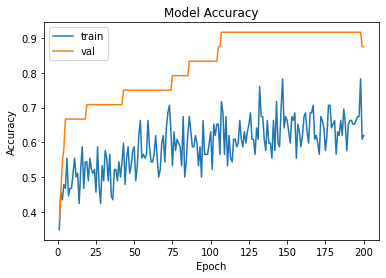

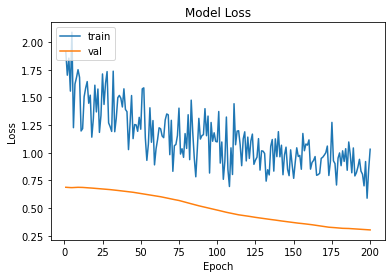

In [ ]:
plot_learningCurve(history,epochs)

In [ ]:
z_test

array([[[-7.55216369e-01],
        [-1.24721730e+00],
        [ 2.65975323e-01],
        [ 4.38894371e-01],
        [ 2.60773981e-01],
        [-9.71042050e-01],
        [ 1.44745749e+00],
        [ 6.13559397e-01],
        [ 5.81574978e-02]],

       [[ 6.64000182e-01],
        [-1.29253880e+00],
        [ 2.65975323e-01],
        [-3.34638649e-01],
        [-2.62065002e-01],
        [-8.63153740e-01],
        [-2.75651833e-01],
        [-1.16348870e-01],
        [-2.38038363e-01]],

       [[ 1.28105086e+00],
        [-4.28229801e-01],
        [-1.82290405e+00],
        [-6.06770235e-01],
        [-5.44698050e-01],
        [-1.02439202e+00],
        [-5.72133378e-04],
        [-8.29524843e-01],
        [-9.21193560e-01]],

       [[ 1.70359643e-01],
        [ 7.87407842e-01],
        [ 1.70829679e+00],
        [ 2.08442110e+00],
        [ 1.95831795e+00],
        [ 6.16700738e-01],
        [-2.99151031e-01],
        [-2.92500658e-01],
        [-3.88866913e-01]],

       [[-1.47555596

In [ ]:
test = [[48],[23.5], [70], [2.707], [0.467408667], [8.8071], [9.7024],[7.99585],[417.114]]
#test = np.asarray(test)
print(test)
'''
test[0][0] = float(48)
test[0][1] = float(23.5)
test[0][2] = float(70)
test[0][3] = float(2.707)
test[0][4] = float(0.467408666666667)
test[0][5] = float(8.8071)
test[0][6] = float(9.7024)
test[0][7] = float(7.99585) 
test[0][8] = float(417.114)
'''

scaler = StandardScaler()
test = scaler.fit_transform(test)
print(test)

test = test.reshape(1,9,1)
print(test)
'''
tunin = np.asarray(tunin)
tunin = tunin.reshape(1,1,1)
predict = (model.predict())
'''
predict = (model.predict(test))
print("predict: ", predict)

[[48], [23.5], [70], [2.707], [0.467408667], [8.8071], [9.7024], [7.99585], [417.114]]
[[-0.13751509]
 [-0.33152205]
 [ 0.03669524]
 [-0.49617458]
 [-0.51390912]
 [-0.44787001]
 [-0.44078044]
 [-0.45429402]
 [ 2.78537006]]
[[[-0.13751509]
  [-0.33152205]
  [ 0.03669524]
  [-0.49617458]
  [-0.51390912]
  [-0.44787001]
  [-0.44078044]
  [-0.45429402]
  [ 2.78537006]]]
predict:  [[0.27573946 0.72426057]]
